# Training CNN model using CIFAR-10 Dataset

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten , BatchNormalization

In [5]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

Exception: URL fetch failure on https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:992)

In [ ]:
print('x_train shape' , x_train.shape)
print('y_train shape' , y_train.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)


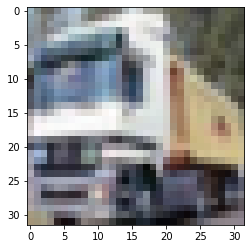

In [ ]:
plt.imshow(x_train[1])

In [ ]:
def normalize(x):
    x = x.astype('float32')
    x = x/255.0
    return x

In [ ]:
datagen = ImageDataGenerator(
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
)

In [ ]:
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state = 0)

In [ ]:
x_train = normalize(x_train)
x_test = normalize(x_test)
x_val = normalize(x_val)

y_train = tf.keras.utils.to_categorical(y_train , 10)
y_test = tf.keras.utils.to_categorical(y_test , 10)
y_val  = tf.keras.utils.to_categorical(y_val , 10)

datagen.fit(x_train)

In [ ]:
def results(model):
  epoch = 100
  r = model.fit(datagen.flow(x_train , y_train , batch_size = 32), epochs = epoch  ,steps_per_epoch=len(x_train)/32, validation_data = (x_val , y_val) , verbose = 1)
  acc = model.evaluate(x_test , y_test)
  print("test set loss : " , acc[0])
  print("test set accuracy :", acc[1]*100)

  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, r.history['accuracy'])
  plt.plot(epoch_range, r.history['val_accuracy'])
  plt.title('Classification Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range,r.history['loss'])
  plt.plot(epoch_range, r.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

In [3]:
weight_decay = 1e-4
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(32, 32, 3)),
	                BatchNormalization(),
                    Conv2D(32, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
	                BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.2),
                    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
	                BatchNormalization(),
                    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),
                    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
	                BatchNormalization(),
                    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),
	                Flatten(),
	                Dense(128, activation='relu'),
                    Dense(10, activation='softmax')                    
])

opt =    tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/100
1563/1562 [==============================] - 47s 30ms/step - loss: 1.7113 - accuracy: 0.3918 - val_loss: 1.4652 - val_accuracy: 0.4928
Epoch 2/100
1563/1562 [==============================] - 47s 30ms/step - loss: 1.3811 - accuracy: 0.5123 - val_loss: 1.2846 - val_accuracy: 0.5614
Epoch 3/100
1563/1562 [==============================] - 47s 30ms/step - loss: 1.2184 - accuracy: 0.5731 - val_loss: 1.1628 - val_accuracy: 0.6012
Epoch 4/100
1563/1562 [==============================] - 47s 30ms/step - loss: 1.1200 - accuracy: 0.6120 - val_loss: 1.1376 - val_accuracy: 0.6272
Epoch 5/100
1563/1562 [==============================] - 47s 30ms/step - loss: 1.0415 - accuracy: 0.6404 - val_loss: 0.9111 - val_accuracy: 0.6970
Epoch 6/100
1563/1562 [==============================] - 47s 30ms/step - loss: 0.9902 - accuracy: 0.6629 - val_loss: 1.1072 - val_accuracy: 0.6378
Epoch 7/100
1563/1562 [==============================] - 47s 30ms/step - loss: 0.9466 - accuracy: 0.6779 - val_loss: 1

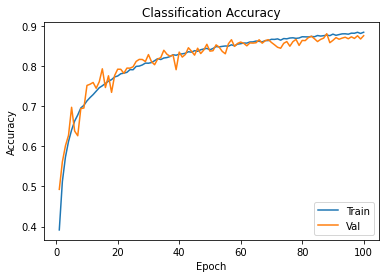

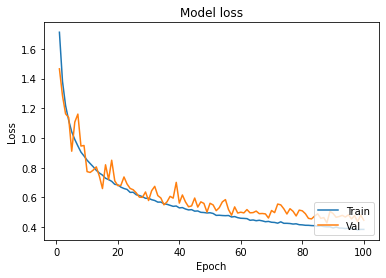

In [ ]:
results(model)

In [ ]:
model.save("model.hdf5")